In [1]:
import numpy as np
import pandas as pd

In [2]:
srs = pd.Series(np.arange(1, 50, 4))
srs

0      1
1      5
2      9
3     13
4     17
5     21
6     25
7     29
8     33
9     37
10    41
11    45
12    49
dtype: int64

In [3]:
srs[1]

np.int64(5)

In [4]:
data = {
    "Name": ["John", "Jim", "Carrie", "Morris"],
    "Gender": ["M", "F", "M", "M"],
    "Profession": ["Athlete", "Tech", "Cricketer", "Actor"],
}

df = pd.DataFrame(data)
df

,Name,Gender,Profession
0,John,M,Athlete
1,Jim,F,Tech
2,Carrie,M,Cricketer
3,Morris,M,Actor


In [5]:
from pathlib import Path

path = Path().joinpath("..", "data", "titanic.csv")
titanic = pd.read_csv(path)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     10 non-null     int64  
 1   pclass       10 non-null     int64  
 2   sex          10 non-null     object 
 3   age          8 non-null      float64
 4   sibsp        10 non-null     int64  
 5   parch        10 non-null     int64  
 6   fare         10 non-null     float64
 7   embarked     10 non-null     object 
 8   class        10 non-null     object 
 9   adult_male   10 non-null     bool   
 10  embark_town  10 non-null     object 
 11  pclass_1     10 non-null     int64  
 12  price        10 non-null     float64
 13  gender       10 non-null     object 
dtypes: bool(1), float64(3), int64(5), object(5)
memory usage: 1.2+ KB


In [6]:
cars = pd.read_csv(path.parent.joinpath("mtcars.csv"), index_col=0)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [7]:
sales = pd.read_csv(path.parent.joinpath("sales.csv"))
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
# Find the Invoice number and Customer ID of the highest amount of purchase based on the given Sales data?
# Setup 1:
sales["Total_amount"] = sales["Quantity"] * sales["Price"]

In [10]:
# Step 2:
invoice_sales = sales.groupby(["Invoice", "Customer ID"])["Total_amount"].sum().reset_index()
invoice_sales.head()

,Invoice,Customer ID,Total_amount
0,489434,13085.0,505.30
1,489435,13085.0,145.80
2,489436,13078.0,630.33
3,489437,15362.0,310.75
4,489438,18102.0,2286.24


In [11]:
# `idxmax` will return the index at which the max of Total_amount is found. Using the index we can get the row.
max_purchase = invoice_sales.loc[invoice_sales["Total_amount"].idxmax()]

In [12]:
invoice_number = max_purchase["Invoice"]
customer_id = max_purchase["Customer ID"]
invoice_number, customer_id

('581483', np.float64(16446.0))

In [19]:
"""
Problem Statement:

Given a dataframe df having the income details for different individuals.
Return a Series that contains the gender-wise average income.

Input Format:
    A DataFrame
Output Format:
    A DataFrame
"""

data = {
    "name": ["Elon", "Jeff", "Bill", "Falguni"],
    "gender": ["M", "F", "M", "F"],
    "income": [53000.0, 28000.0, 25000.0, 44000.0],
}

df = pd.DataFrame(data)

res = df.groupby("gender")[["income"]].mean()
res

,income
gender,
F,36000.0
M,39000.0


In [25]:
"""
Problem Description:

Given a dataset about salesperson and customer orders, the task is to group the data as per salesman_id and customer_id, and return a new dataframe with the ord_no count for each salesman_id and customer_id pair.

Input Format:
    The first line of the input contains the dataframe, in the form of a dictionary.

Output Format:
    The new dataframe

Sample Explanation:
    The data is grouped by salesman_id and customer_id, with the count of each (as in salesman_id 5001 with customer_id 3002 appears 3 times, and so on).
"""

data = {
    "ord_no": [70001, 70009, 70002, 70004, 70007, 70005, 70008, 70010, 70003, 70012, 70011, 70013],
    "purch_amt": [150.50, 270.65, 65.26, 110.50, 948.50, 2400.60, 5760.00, 1983.43, 2480.40, 250.45, 75.29, 3045.60],
    "ord_date": [
        "2012-10-05",
        "2012-09-10",
        "2012-10-05",
        "2012-08-17",
        "2012-09-10",
        "2012-07-27",
        "2012-09-10",
        "2012-10-10",
        "2012-10-10",
        "2012-06-27",
        "2012-08-17",
        "2012-04-25",
    ],
    "customer_id": [3005, 3001, 3002, 3009, 3005, 3007, 3002, 3004, 3009, 3008, 3003, 3002],
    "salesman_id": [5002, 5005, 5001, 5003, 5002, 5001, 5001, 5006, 5003, 5002, 5007, 5001],
}

df = pd.DataFrame(data)
# df.groupby(['salesman_id', 'customer_id']).size().reset_index(name='ord_count')
df.groupby(["salesman_id", "customer_id"], as_index=False)[["ord_no"]].count()

,salesman_id,customer_id,ord_no
0,5001,3002,3
1,5001,3007,1
2,5002,3005,2
3,5002,3008,1
4,5003,3009,2
5,5005,3001,1
6,5006,3004,1
7,5007,3003,1


In [34]:
"""
Considering the given Sales data, which of these is the most selling Product based irrespective of their Price?
"""
sales.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(1)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    108545
Name: Quantity, dtype: int64

In [ ]:
pd.DataFrame(
    [
        ["2019-03-23 20:21:09", "2019-03-23 20:27:24", 1, 1.6],
        ["2019-03-04 16:11:55", "2019-03-04 16:19:00", 1, 0.79],
        ["2019-03-27 17:53:01", "2019-03-27 18:00:25", 1, 1.37],
        ["2019-03-10 01:23:59", "2019-03-10 01:49:51", 1, 7.70],
        ["2019-03-30 13:27:42", "2019-03-30 13:37:14", 3, 2.16],
    ],
    columns=["pickup", "dropoff", "passengers", "distance"],
)
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])
df

In [59]:
bins = [0, 6, 12, 18, 24]
labels = ["morning", "day", "afternoon", "night"]

df["time_of_day"] = pd.cut(df["pickup"].dt.hour, bins=bins, labels=labels)

res = df[["time_of_day"]].value_counts().sort_values(ascending=False)

res.name = "pickup"
res

time_of_day
afternoon      3
morning        1
night          1
day            0
Name: pickup, dtype: int64

In [60]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='age'>

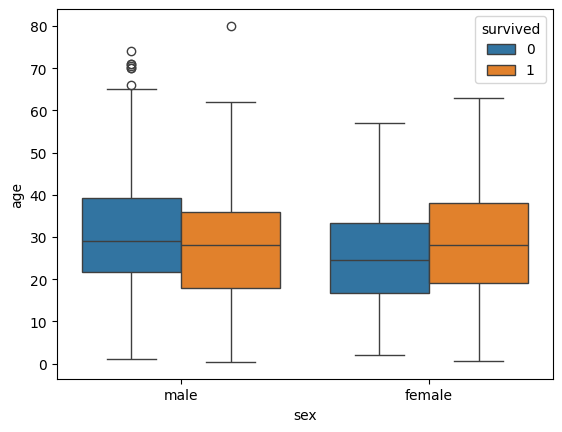

In [61]:
import seaborn as sns

sns.boxplot(data=titanic, x="sex", y="age", hue="survived")

<Axes: xlabel='survived', ylabel='age'>

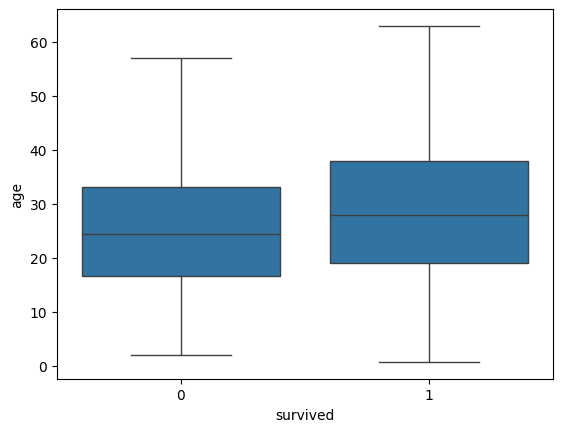

In [62]:
females = titanic[titanic["sex"] == "female"]
sns.boxplot(x="survived", y="age", data=females)